In [10]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram

In [2]:
QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    token="f00ee7488d13ce827aab18d868467c3a332e1620794fb5cb07c1f8e764fd37dbf2315eea0efa59c42f3c45d62f7f5b79778d752a95a2fb6363c79395484eb410",
    set_as_default=True,
    # Use `overwrite=True` if you're updating your token.
    overwrite=True,
)
 
# Load saved credentials
service = QiskitRuntimeService()

In [9]:
backend=service.backend("ibm_brisbane")

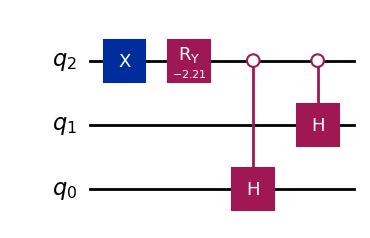

In [5]:
from qiskit.circuit.library.data_preparation import UniformSuperpositionGate

M=5
num_qubits=3
usp_gate=UniformSuperpositionGate(M,num_qubits)

qc=QuantumCircuit(num_qubits)
qc.append(usp_gate,list(range(num_qubits)))
qc.decompose().draw(output="mpl",reverse_bits=True)

In [7]:
zeros=Statevector.from_label("000")
sv=zeros.evolve(qc)
sv.draw(output="latex")

<IPython.core.display.Latex object>

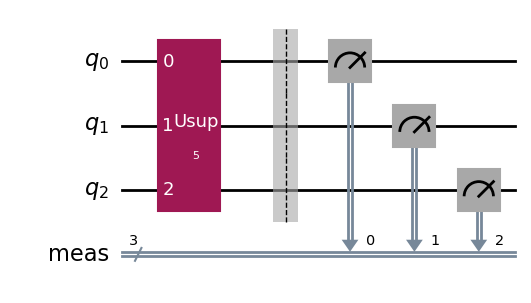

In [8]:
qc.measure_all()
qc.draw(output="mpl")

In [12]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager 


pm=generate_preset_pass_manager(backend=backend,optimization_level=3)

opt_qc=pm.run(qc)

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler 

sampler=Sampler(mode=backend)

job = service.job('cvr5b9d55th0008rt780')
result = job.result()[0]

counts=result.data.meas.get_counts()

plot_histogram(counts,title=f"Data acquired from:{backend.name}",color="crimson")


In [16]:
from qiskit.circuit import (
    Parameter, QuantumCircuit, ClassicalRegister, QuantumRegister
)
from qiskit.primitives import StatevectorSampler
 
import matplotlib.pyplot as plt
import numpy as np
 
# Define our circuit registers, including classical registers
# called 'alpha' and 'beta'.
qreg = QuantumRegister(3)
alpha = ClassicalRegister(2, "alpha")
beta = ClassicalRegister(1, "beta")

In [17]:
circuit = QuantumCircuit(qreg, alpha, beta)
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(1, 2)
circuit.ry(Parameter("a"), 0)
circuit.rz(Parameter("b"), 0)
circuit.cx(1, 2)
circuit.cx(0, 1)
circuit.h(0)
circuit.measure([0, 1], alpha)
circuit.measure([2], beta)

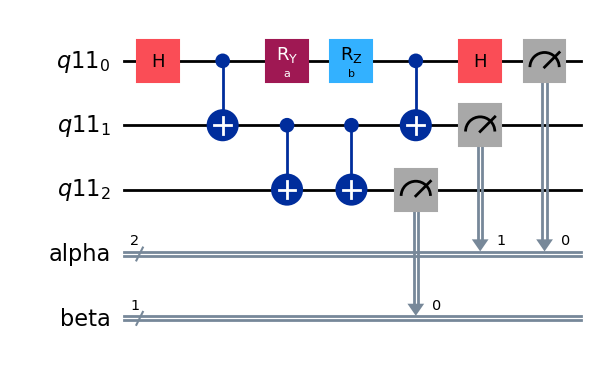

In [18]:
circuit.draw(output="mpl")

In [19]:
params = np.vstack([
    np.linspace(-np.pi, np.pi, 100),
    np.linspace(-4 * np.pi, 4 * np.pi, 100)
]).T

In [20]:
sampler = StatevectorSampler()
 
# Start a job that will return shots for all 100 parameter value sets.
pub = (circuit, params)
job = sampler.run([pub], shots=256)
 
# Extract the result for the 0th pub (this example only has one pub).
result = job.result()[0]

In [ ]:
assert result.data.alpha.shape==(100,)
assert result.data.alpha.num_bits==2 
assert result.data.alpha.num_shots==256

raw=result.data.alpha.array 

counts=result.data.alpha.get_counts(22) 

bitstrings=result.data.alpha.get_bitstrings(22)
print(*bitstrings,sep='\n')

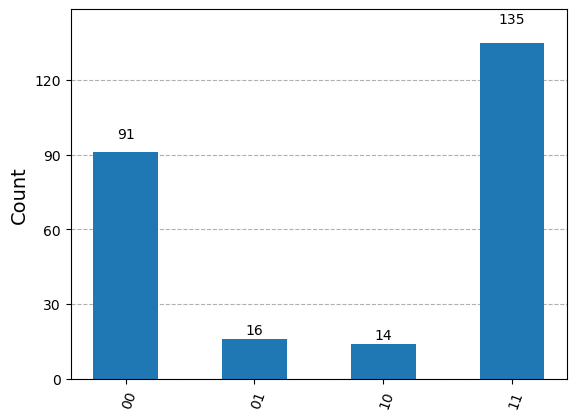

In [23]:
plot_histogram(counts)

In [36]:
import numpy as np

In [49]:
print(num_operand_dist(4))

{1: 0.78, 2: 0.02, 3: 0.0, 4: 0.17}


In [57]:
from qiskit.circuit.random import random_circuit 

circ=random_circuit(
    num_qubits=8,
    depth=12,
    num_operand_distribution={1:0.25,2:0.25,3:0.25,4:0.25},
)


circ.measure_all()

In [58]:
rand_pub=pm.run(circ)

sampler=Sampler(mode=backend)

pub=sampler.run([rand_pub])

print(f"Job id: {pub.job_id()}")

Job id: cvr5prvtr1zg00836jq0
